In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import mstats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.metrics import recall_score,accuracy_score, mean_squared_error, r2_score, log_loss, precision_score

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind

from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score, precision_score,roc_auc_score,f1_score,confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
# from pytorch_tabnet.tab_model import TabNetClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 0.파일 불러오기

In [44]:
df = pd.read_csv('../data/processed_data/재무비율_final.csv')
df

,회사명,거래소코드,회계년도,소속코드,통계청 한국표준산업분류 코드 10차(대분류),산업코드,산업명,상장일,상장폐지일,총자본증가율(IFRS),...,기계장비율(IFRS),자본집약도(IFRS),총자본투자효율(IFRS),설비투자효율(IFRS),기계투자효율(IFRS),부가가치율(IFRS),노동소득분배율(IFRS),자본분배율(IFRS),이윤분배율(IFRS),label
0,(주)다이나믹디자인,145210,2015,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,-4.56,...,207.99,1884.51,19.72,47.24,98.91,29.06,70.82,29.18,2.06,1
1,(주)다이나믹디자인,145210,2016,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,-12.91,...,0.00,1807.53,-3.89,-8.14,0.00,-5.57,0.00,0.00,0.00,1
2,(주)다이나믹디자인,145210,2017,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,-17.07,...,51.56,335.64,8.59,17.23,44.66,12.60,190.09,-90.09,-161.93,1
3,(주)대우건설,47040,2012,1,41,64101,종합 건설업,2001-03-23,NaN,4.13,...,7.74,1802.31,13.73,320.28,2422.60,16.47,59.28,40.72,12.78,0
4,(주)대우건설,47040,2013,1,41,64101,종합 건설업,2001-03-23,NaN,2.67,...,6.58,1523.25,4.00,94.39,731.03,4.62,225.45,-125.45,-177.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,한솔아이원스(주),114810,2014,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,-0.08,...,124.05,333.32,24.18,38.24,64.97,36.25,45.96,54.04,22.74,1
385,한솔아이원스(주),114810,2015,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,26.94,...,50.84,362.50,17.79,50.15,126.87,33.75,59.94,40.06,5.72,1
386,한솔아이원스(주),114810,2016,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,19.93,...,66.13,401.55,7.78,12.58,47.27,14.45,150.52,-50.52,-131.65,1
387,한솔아이원스(주),114810,2017,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,18.82,...,50.51,361.28,17.01,31.36,121.67,24.62,59.64,40.36,-1.99,1


In [45]:
X_data = df[df.columns[9:-1]]
y_data = df['label']

## 1.데이터 split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3,stratify=y_data,random_state = 40)
lgb_X_train,lgb_X_test,lgb_y_train,lgb_y_test = train_test_split(X_data,y_data,test_size=0.3,stratify=y_data,random_state = 40)

In [47]:
n, d = X_train.shape
print("number of feature:", d)  
print("number of data:", n)

number of feature: 133
number of data: 272


## 윈저라이징

In [48]:
# before_winsor_feature = X_train.copy()

In [49]:
# X_train.columns

In [50]:
# # from matplotlib import font_manager, rc
# # import seaborn as sns
# # import matplotlib.pyplot as plt

# # plt.rcParams['font.family'] = 'Malgun Gothic'

# selected_variables = X_train
# # 5x4 subplot 생성
# fig, axes = plt.subplots(14, 10, figsize=(40, 30))
# axes = axes.flatten()  # 2D axes 배열을 1D 배열로 변환

# for i, var in enumerate(selected_variables):
#     # i번째 axes에 i번째 변수의 히스토그램을 그림
#     axes[i].boxplot(df[var])
#     axes[i].set_title(var)  # 각 히스토그램에 변수 이름을 제목으로 설정

# plt.tight_layout()  # subplot 간격 조정
# plt.show()

In [51]:
# X_train.describe()

## 2. 이상치 처리
컬럼마다 이상치의 분포가 상하위, 상위, 하위에 분포하는 비율이 다르기 때문에 각자 다르게 이상치 조정 필요
- 상하위 고르게 분포한 컬럼
- 상위에 분포한 컬럼
- 하위에 분포한 컬럼

In [52]:
# # import numpy as np
# # from scipy.stats import mstats
# # import statsmodels.api as sm

# # 중앙값과 절대 중앙값 편차 (MAD) 계산 함수
# def mad_based_outliers(df, threshold=3):        # 임계값은 3으로 설정
#     median = np.median(df)
#     mad = sm.robust.scale.mad(df)
#     mad_scaled = np.abs(df - median) / mad if mad != 0 else 0
#     return mad_scaled > threshold

# # 윈저라이징 조건 설정 함수
# def apply_winsorization_based_on_outliers(df, threshold=3):
#     winsorization_info = {}  # 각 컬럼별 윈저라이징 방식을 저장할 딕셔너리

#     for column in df.columns:
#         # MAD 기반 이상치 탐지
#         outliers_mask = mad_based_outliers(df[column], threshold)
#         outliers_high = np.sum(outliers_mask & (df[column] > np.median(df[column])))
#         outliers_low = np.sum(outliers_mask & (df[column] < np.median(df[column])))

#         # 조건에 따라 윈저라이징 방식 결정
#         if outliers_high > 0 and outliers_low == 0:  # 상위 이상치만 있을 때
#             df[column] = mstats.winsorize(df[column], limits=(0, 0.02))  # 상위 2%만 윈저라이징
#             winsorization_info[column] = "상위 2% 윈저라이징"
#         elif outliers_low > 0 and outliers_high == 0:  # 하위 이상치만 있을 때
#             df[column] = mstats.winsorize(df[column], limits=(0.02, 0))  # 하위 2%만 윈저라이징
#             winsorization_info[column] = "하위 2% 윈저라이징"
#         elif outliers_high > 0 and outliers_low > 0:  # 상하위 이상치가 모두 있을 때
#             df[column] = mstats.winsorize(df[column], limits=(0.01, 0.01))  # 상하위 1%씩 윈저라이징
#             winsorization_info[column] = "상하위 1% 윈저라이징"
#     return winsorization_info

In [53]:
# winsorization_info = apply_winsorization_based_on_outliers(X_train)

In [54]:
# winsorization_info

In [55]:
# X_train.describe()

In [56]:
# before_winsor_feature.describe()

이상치 처리 후 시각화

In [57]:
# selected_variables = X_train
# # 5x4 subplot 생성
# fig, axes = plt.subplots(14, 10, figsize=(40, 30))
# axes = axes.flatten()  # 2D axes 배열을 1D 배열로 변환

# for i, var in enumerate(selected_variables):
#     # i번째 axes에 i번째 변수의 히스토그램을 그림
#     axes[i].boxplot(df[var])
#     axes[i].set_title(var)  # 각 히스토그램에 변수 이름을 제목으로 설정

# plt.tight_layout()  # subplot 간격 조정
# plt.show()

## 3. 스케일링

## 4. Feature Selection

In [58]:
# a_list = 10**np.linspace(-1,5,7)
# ratio = np.linspace(0,1,20)
# mean_squred_err = lambda y, yhat:np((y-yhat)**2)

In [59]:
# X_train = X_train.fillna(0)

In [60]:
# lasso = LassoCV(alphas=a_list)
# lasso.fit(X_train, y_train)

# print("The best alpha value is ", lasso.alpha_)
# print("Features selected:", lasso.coef_.nonzero()[0])
# print("The R^2 is ", lasso.score(X_train, y_train))
# print("The MSE of the best model is", mean_squared_error(y_train, lasso.predict(X_train)))

In [61]:
# list_1 = list(lasso.coef_.nonzero()[0])
# for i in list_1:
#     print(X_train.columns[int(i)])

In [62]:
# def feature_selection_ttest(X, y, alpha=0.05):
#     selected_features = []
#     p_values = {}
    
#     for column in X.columns:
#         t_stat, p_value = ttest_ind(X.loc[y == 0, column], X.loc[y == 1, column])
        
#         if p_value < alpha:
#             selected_features.append(column)
#             p_values[column] = p_value
    
#     return selected_features, p_values

# # t-test를 사용하여 피처 선택
# selected_features, p_values = feature_selection_ttest(X_train, y_train)

# print("Selected features:", selected_features)
# print("P-values for selected features:", p_values)

In [63]:
# len(selected_features)

In [64]:
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

In [65]:
# # VIF를 계산합니다.
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_train.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# print(vif_data)

In [66]:
# # VIF를 계산합니다.
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_train.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# print("VIF 데이터:")
# print(vif_data)

# # 상관행렬을 계산합니다.
# corr_matrix = X_train.corr()

# # 히트맵을 그립니다.
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')
# plt.show()

## 5. resampling

In [67]:
# from collections import Counter
# from matplotlib import pyplot
# def count_and_plot(y):
#     counter = Counter(y)
#     for k, v in counter.items():
#         print('Class=%d, n=%d (%.3f%%)' %(k,v,v /len(y) *100))
#     pyplot.bar(counter.keys(), counter.values())
#     pyplot.show()

In [68]:
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import TomekLinks
# smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# X_train_resampled_t, y_train_resampled_t = smoteto.fit_resample(X_train, y_train)
# count_and_plot(y_train_resampled_t)

## 6. 모델링

### 6.1 로지스틱 회귀 분석

In [69]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # 로지스틱 회귀 모델 생성과 학습
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # 테스트 데이터에 대한 예측
# y_pred = model.predict(X_test)

# # 다양한 평가 지표 출력
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


In [70]:
# from sklearn.model_selection import GridSearchCV

# # 로지스틱 회귀 모델 생성
# logistic = LogisticRegression()

# # 하이퍼파라미터 그리드 정의
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# # 그리드 서치 객체 생성
# grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy')

# # 그리드 서치로 모델 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best Parameter:", grid_search.best_params_)

# # 최적의 모델을 테스트 데이터에 적용
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # 다양한 평가 지표 출력
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


Accuracy: 0.7606837606837606
Precision: 0.7606837606837606
Recall: 1.0
F1 Score: 0.8640776699029126
Confusion_matrix:  
 [[ 0 28]
 [ 0 89]]


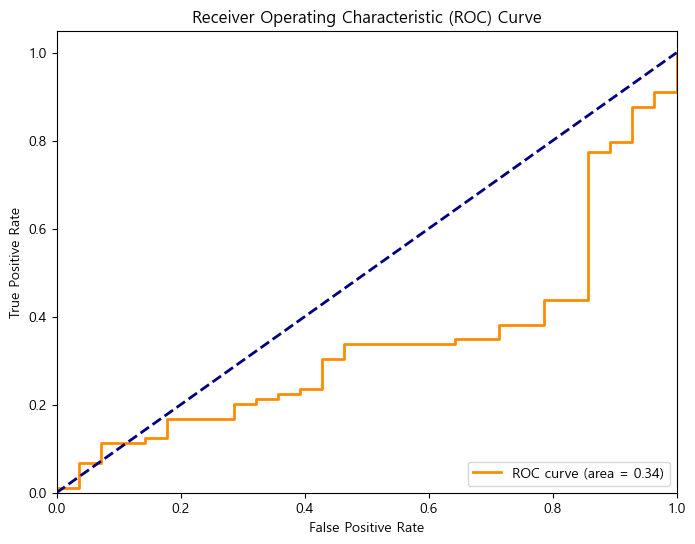

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt

# 예시 데이터 (X_train, X_test, y_train, y_test가 있다고 가정)
# model 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가 지표 계산
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

# ROC 커브 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## 6-2.catboost

In [72]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CatBoost 모델 생성
model = CatBoostClassifier(iterations=100, learning_rate=0.1, loss_function='Logloss')

# 모델 학습
model.fit(X_train, y_train, verbose=0)

# 테스트 데이터에 대한 예측
y_pred2 = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

Accuracy: 0.7606837606837606
Precision: 0.7606837606837606
Recall: 1.0
F1 Score: 0.8640776699029126
Confusion_matrix:  
 [[ 0 28]
 [ 0 89]]


### 6-3.Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree 모델 생성
model = DecisionTreeClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

Accuracy: 0.7692307692307693
Precision: 0.8522727272727273
Recall: 0.8426966292134831
F1 Score: 0.8474576271186441
Confusion_matrix:  
 [[15 13]
 [14 75]]


### 6-4.나이브베이즈

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 기본 나이브 베이즈 분류기 생성
base_model = GaussianNB()

# 배깅 분류기 생성
model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion_matrix: ', '\n', matrix)

Accuracy: 0.3162393162393162
Precision: 0.9090909090909091
Recall: 0.11235955056179775
F1 Score: 0.19999999999999998
Confusion_matrix:  
 [[27  1]
 [79 10]]


In [75]:
# X_test = X_test.fillna(0)

In [76]:
df2 = pd.DataFrame()

In [77]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_train = logit.predict(X_train)
y_pred_test = logit.predict(X_test)

log_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
log_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['logit_train'] = log_train
df2['logit_test'] = log_test

print(confusion_matrix(y_test,y_pred_test))

[[ 0 28]
 [ 0 89]]


In [78]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

rf_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
rf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['rf_train'] = rf_train
df2['rf_test'] = rf_test


print(confusion_matrix(y_test,y_pred_test))

[[ 8 20]
 [ 2 87]]


In [79]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

xgb_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
xgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['xgb_train'] = xgb_train
df2['xgb_test'] = xgb_test


print(confusion_matrix(y_test,y_pred_test))

[[12 16]
 [ 3 86]]


In [84]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred_train = lgb.predict(X_train)
y_pred_test = lgb.predict(X_test)

lgb_train =[accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
lgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['lgb_train'] = lgb_train
df2['lgb_test'] = lgb_test


print(confusion_matrix(y_test,y_pred_test))

LightGBMError: Do not support special JSON characters in feature name.

In [85]:
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(X_train, y_train)
y_pred_train = cat.predict(X_train)
y_pred_test = cat.predict(X_test)

cat_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
cat_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['cat_train'] = cat_train
df2['cat_test'] = cat_test


print(confusion_matrix(y_test,y_pred_test))

[[10 18]
 [ 2 87]]


In [86]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred_train = svc_clf.predict(X_train)
y_pred_test = svc_clf.predict(X_test)

svc_clf_train =[accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
svc_clf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['svm_train'] = svc_clf_train
df2['svm_test'] = svc_clf_test


print(confusion_matrix(y_test,y_pred_test))

[[ 0 28]
 [ 0 89]]


In [87]:
# clf = TabNetClassifier()

# # 모델 훈련
# clf.fit(
#     X_train.values, y_train.values,
#     eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
#     eval_name=['train', 'test'],
#     eval_metric=['accuracy'],
#     max_epochs=10,
#     patience=10,
#     batch_size=1024, 
#     virtual_batch_size=128,
#     num_workers=0,
#     drop_last=False
# )

ImportError: cannot import name 'maybe_upload_prof_stats_to_manifold' from 'torch._utils_internal' (c:\Users\skfns\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\_utils_internal.py)

In [91]:
# y_pred_train = clf.predict(X_train.values)
# y_pred_test = clf.predict(X_test.values)

# tab_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
# tab_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

# df['tabnet_train'] = tab_train
# df['tabnet_test'] = tab_test


# print(confusion_matrix(y_test,y_pred_test))

ValueError: Length of values (5) does not match length of index (389)

In [89]:
# import torch
# import pytorch_tabnet

# print("PyTorch Version:", torch.__version__)
# print("pytorch_tabnet Version:", pytorch_tabnet.__version__)


PyTorch Version: 2.3.0+cpu


AttributeError: module 'pytorch_tabnet' has no attribute '__version__'

In [87]:
df2.index = ['accuracy','precision','recall','f1-score','roc-auc']
df2

,logit_train,logit_test,rf_train,rf_test,xgb_train,xgb_test,cat_train,cat_test,svm_train,svm_test
accuracy,0.764706,0.760684,1.0,0.811966,1.0,0.837607,1.0,0.829060,0.761029,0.760684
precision,0.765799,0.760684,1.0,0.813084,1.0,0.843137,1.0,0.828571,0.761029,0.760684
recall,0.995169,1.000000,1.0,0.977528,1.0,0.966292,1.0,0.977528,1.000000,1.000000
f1-score,0.865546,0.864078,1.0,0.887755,1.0,0.900524,1.0,0.896907,0.864301,0.864078
roc-auc,0.512969,0.500000,1.0,0.631621,1.0,0.697432,1.0,0.667335,0.500000,0.500000
